In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
data = pd.read_csv('C:\\Users\\ma007\\Downloads\\Assignemnt\\Q1_property.csv', sep=';')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [25]:
data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,NaN,NaN


In [26]:
data.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent'],
      dtype='object')

In [27]:

missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

data['price'] = data['price'].fillna(data['price'].mean())


Missing values per column:
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           47379
agent            47380
dtype: int64


In [28]:

column_name = 'price' 

Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outlier_indices = (data[column_name] < Q1 - threshold * IQR) | (data[column_name] > Q3 + threshold * IQR)

median_value = data[column_name].median()
data.loc[outlier_indices, column_name] = median_value

C:\Users\ma007\AppData\Local\Temp\ipykernel_7196\671132971.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


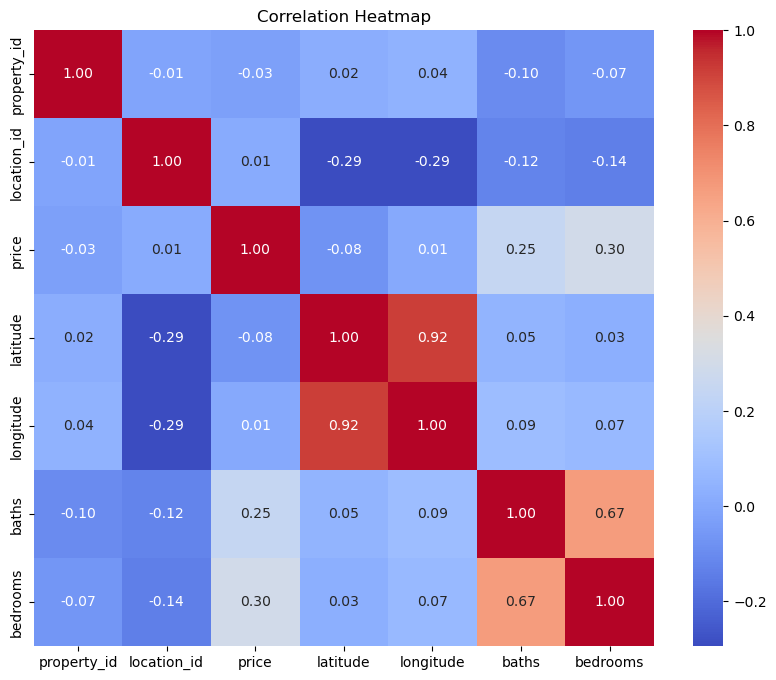

In [29]:

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\ma007\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


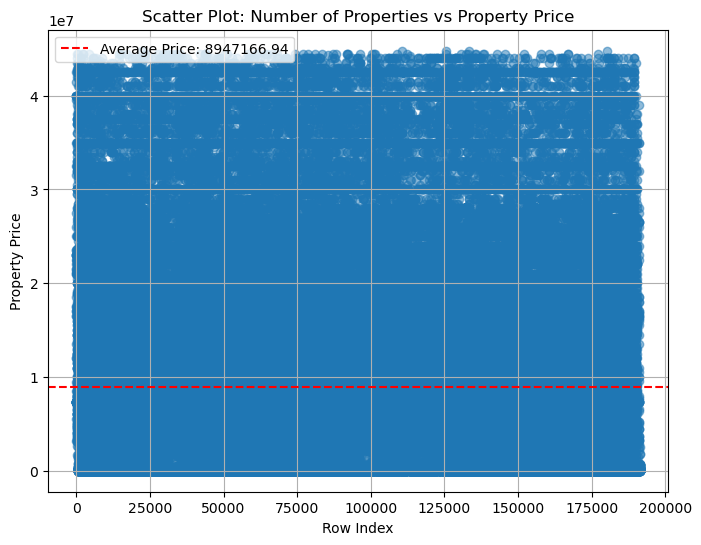

In [30]:

price_column = 'price'

average_price = data[price_column].mean()
number_of_properties = 191394  # Number of rows

plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[price_column], alpha=0.5)
plt.axhline(y=average_price, color='r', linestyle='--', label=f'Average Price: {average_price:.2f}')
plt.title('Scatter Plot: Number of Properties vs Property Price')
plt.xlabel('Row Index')
plt.ylabel('Property Price')
plt.legend()
plt.grid(True)
plt.show()

In [31]:

data.to_csv('C:\\Users\\ma007\\Downloads\\Assignemnt\\updated_data.csv', index=False)

In [33]:

data['area'] = pd.to_numeric(data['area'], errors='coerce')

data['price_per_sqm'] = data['price'] / data['area']


In [34]:
data.columns = data.columns.str.strip()

In [35]:
if 'date_added' in data.columns:
    data['date_added'] = pd.to_datetime(data['date_added'])
    data['month'] = data['date_added'].dt.month
    data['quarter'] = data['date_added'].dt.quarter
    data['day_of_week'] = data['date_added'].dt.dayofweek
else:
    print("Column 'date_added' not found in the DataFrame.")

In [36]:
print("NaN values in numerical columns:")
print(data[numerical_columns].isna().sum())

print("\nInfinite values in numerical columns:")
print((~np.isfinite(data[numerical_columns])).sum())


NaN values in numerical columns:
price                 0
area             191393
price_per_sqm    191393
dtype: int64

Infinite values in numerical columns:
price                 0
area             191393
price_per_sqm    191393
dtype: int64


In [37]:
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


In [38]:

numerical_columns = ['price', 'area', 'price_per_sqm']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [39]:
print(X_imputed.shape)

(191393, 1)


In [40]:
print("Unique values in 'area' feature:", X['area'].unique())


KeyError: 'area'

In [41]:

features = ['area'] 
X = data[features]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
target_variable = 'price'
features = ['price']
X = data[features]
y = data[target_variable]
missing_values = X.isnull().sum()
print("Missing values in selected features:")
print(missing_values)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

print("Shape of X_imputed:", X_imputed.shape)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

coefficients = model.coef_
intercept = model.intercept_

print('Coefficients: {coefficients}')
print('Intercept: {intercept}')


Missing values in selected features:
price    0
dtype: int64
Shape of X_imputed: (191393, 1)
Mean Squared Error: 1.7688300556727157e-28
Coefficients: [1.]
Intercept: -1.2468324983583301e-17


In [22]:


mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mse)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Squared Error (MSE): 1.7688300556727157e-28
Mean Absolute Error (MAE): 1.0211479376404563e-14
Root Mean Squared Error (RMSE): 1.3299737048801814e-14
Mean Absolute Percentage Error (MAPE): 1.3239474111511182e-12%
